In [24]:
! apt install libgraphviz-dev
! pip install geoplot pyvis pygraphviz

Reading package lists... Done
^C


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
from collections import Counter
from IPython.display import display, HTML
import plotly.express as px

In [1]:
url = "https://raw.githubusercontent.com/pilatova/prot-viz-data/test/dist2.tsv"

dist = pd.read_csv(
    url,
    sep='\t',           # Tab separator for TSV files
    header=0,           # Use the first row as headers
    index_col=0         # Set the first column ("protein_id") as the index
)

display(dist)

,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
protein_id,,,,,,,,,,,,,,,
A0A087WTH1,0.029031,0.154998,0.110481,0.196955,0.344118,0.144013,0.109375,0.232052,0.385447,0.138486,0.217262,0.389459,0.192162,0.368851,0.437878
A0A087WZ39,0.103670,0.377518,0.391924,0.578767,0.941801,0.453725,0.498146,0.613333,1.076725,0.406620,0.474470,0.844741,0.525629,0.926316,1.071503
A0A096LP49,0.160867,0.640212,0.633581,0.685461,2.314668,0.667860,0.642229,0.718148,2.226590,0.552318,0.822833,2.328829,0.775940,2.277628,2.473843
A0A0U1RRA0,0.016778,0.143482,0.109374,0.167911,0.544500,0.162434,0.128345,0.148527,0.536199,0.088828,0.183459,0.661912,0.089641,0.556196,0.551611
A0A126GWI2,0.061848,0.209570,0.176613,0.199606,0.276475,0.206727,0.171825,0.195499,0.269331,0.161940,0.212899,0.259762,0.185132,0.232008,0.252956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y8,0.020182,0.097383,0.087803,0.145415,0.200164,0.092122,0.083755,0.143263,0.199263,0.072680,0.137832,0.189800,0.135092,0.196943,0.242393
Q9Y6Y9,0.078279,0.493353,0.340358,0.497160,0.827787,0.468792,0.350418,0.504158,0.774873,0.306680,0.520962,0.909269,0.459060,0.850035,0.937334
Q9Y6Z7,0.011360,0.070712,0.066309,0.125549,0.252660,0.070417,0.066584,0.129581,0.242320,0.054214,0.143420,0.219843,0.142122,0.222810,0.280857


In [2]:
url2 = "https://raw.githubusercontent.com/pilatova/prot-viz-data/refs/heads/main/goslim.tsv"
id = pd.read_csv(
    url2,
    sep='\t',
    header=0,
    index_col=0
)
display(id)

,go_id
protein_id,
A0A087WZ39,GO:0005886
A0A087WZ39,GO:0023052
A0A096LP49,GO:0005815
A0A096LP49,GO:0005856
A0A096LP49,GO:0007010
...,...
Q9Y6Z7,GO:0098772
W5XKT8,GO:0022414
W5XKT8,GO:0031410


In [3]:
url3 = "https://raw.githubusercontent.com/pilatova/prot-viz-data/refs/heads/main/goslim-names.tsv"
functions = pd.read_csv(
    url3,
    sep='\t',
    header=0,
    index_col=0
)


In [4]:
mer = id.merge(functions, on='go_id', how='left')
mer = mer.set_index(id.index)
#er = mer.drop(['level_0', 'index'], axis =1)
display(mer)
molecular_functions = [
    "virus receptor activity",
    "DNA binding",
    "RNA binding",
    "cytoskeletal motor activity",
    "catalytic activity",
    "GTPase activity",
    "structural molecule activity",
    "transporter activity",
    "cytoskeletal protein binding",
    "lipid binding",
    "cyclase activity",
    "antioxidant activity",
    "oxidoreductase activity",
    "transferase activity",
    "hydrolase activity",
    "lyase activity",
    "isomerase activity",
    "ligase activity",
    "protein tag activity",
    "cargo receptor activity",
    "histone binding",
    "protein folding chaperone",
    "translation regulator activity",
    "receptor ligand activity",
    "molecular transducer activity",
    "molecular adaptor activity",
    "cell adhesion mediator activity",
    "molecular function regulator activity",
    "virus coreceptor activity",
    "catalytic activity, acting on a protein",
    "catalytic activity, acting on DNA",
    "catalytic activity, acting on RNA",
    "molecular carrier activity",
    "transcription regulator activity",
    "general transcription initiation factor activity",
    "molecular sensor activity",
    "molecular sequestering activity",
    "ATP-dependent activity"
]
cellular_components = [
    "nuclear chromosome",
    "extracellular region",
    "extracellular space",
    "nucleus",
    "nuclear envelope",
    "nucleoplasm",
    "chromosome",
    "nucleolus",
    "mitochondrion",
    "lysosome",
    "endosome",
    "vacuole",
    "peroxisome",
    "endoplasmic reticulum",
    "Golgi apparatus",
    "lipid droplet",
    "microtubule organizing center",
    "cytosol",
    "ribosome",
    "cytoskeleton",
    "plasma membrane",
    "cilium",
    "external encapsulating structure",
    "extracellular matrix",
    "cytoplasmic vesicle",
    "organelle"
]
biological_processes = [
    "mitotic cell cycle",
    "cytokinesis",
    "cytoplasmic translation",
    "immune system process",
    "muscle system process",
    "circulatory system process",
    "renal system process",
    "respiratory system process",
    "carbohydrate metabolic process",
    "generation of precursor metabolites and energy",
    "DNA replication",
    "DNA repair",
    "DNA recombination",
    "chromatin organization",
    "DNA-templated transcription",
    "regulation of DNA-templated transcription",
    "tRNA metabolic process",
    "protein folding",
    "protein glycosylation",
    "amino acid metabolic process",
    "modified amino acid metabolic process",
    "lipid metabolic process",
    "vitamin metabolic process",
    "sulfur compound metabolic process",
    "intracellular protein transport",
    "nucleocytoplasmic transport",
    "autophagy",
    "inflammatory response",
    "mitochondrion organization",
    "cytoskeleton organization",
    "microtubule-based movement",
    "peroxisome organization",
    "lysosome organization",
    "chromosome segregation",
    "cell adhesion",
    "establishment or maintenance of cell polarity",
    "programmed cell death",
    "mRNA metabolic process",
    "snRNA metabolic process",
    "vesicle-mediated transport",
    "reproductive process",
    "digestive system process",
    "signaling",
    "cell differentiation",
    "protein catabolic process",
    "extracellular matrix organization",
    "regulatory ncRNA-mediated gene silencing",
    "telomere organization",
    "cell junction organization",
    "protein modification process",
    "wound healing",
    "ribosome biogenesis",
    "cilium organization",
    "anatomical structure development",
    "cell motility",
    "nervous system process",
    "endocrine process",
    "protein maturation",
    "transmembrane transport",
    "nucleobase-containing small molecule metabolic process",
    "membrane organization",
    "protein-containing complex assembly",
    "nitrogen cycle metabolic process",
    "protein localization to plasma membrane",
    "defense response to other organism",
    "detoxification",
    "meiotic nuclear division",
    "mitotic nuclear division",
    "mitochondrial gene expression",
    "carbohydrate derivative metabolic process"
]
complete_functions = pd.DataFrame()
complete_functions['protein_id'] = list(dist.index)
cc = []
bp = []
mf = []
mer = mer.reset_index()
for i in list(dist.index):

  tab = mer[mer['protein_id'] == i]
  mf_tab = []
  cc_tab = []
  bp_tab = []
  for j in tab['name']:
    if j in molecular_functions:
      mf_tab.append(j)
    if j in cellular_components:
      cc_tab.append(j)
    if j in biological_processes:
      bp_tab.append(j)
  if mf_tab == []:
    mf.append('None')
  else:
    mf.append(mf_tab)
  if bp_tab == []:
    bp.append('None')
  else:
    bp.append(bp_tab)
  if cc_tab == []:
    cc.append('None')
  else:
    cc.append(cc_tab)
complete_functions['cellular_component'] = cc
complete_functions['biological_process'] = bp
complete_functions['molecular_functions'] = mf
display(complete_functions)


,go_id,name
protein_id,,
A0A087WZ39,GO:0005886,plasma membrane
A0A087WZ39,GO:0023052,signaling
A0A096LP49,GO:0005815,microtubule organizing center
A0A096LP49,GO:0005856,cytoskeleton
A0A096LP49,GO:0007010,cytoskeleton organization
...,...,...
Q9Y6Z7,GO:0098772,molecular function regulator activity
W5XKT8,GO:0022414,reproductive process
W5XKT8,GO:0031410,cytoplasmic vesicle


,protein_id,cellular_component,biological_process,molecular_functions
0,A0A087WTH1,None,None,None
1,A0A087WZ39,[plasma membrane],[signaling],None
2,A0A096LP49,"[microtubule organizing center, cytoskeleton, ...",[cytoskeleton organization],[cytoskeletal protein binding]
3,A0A0U1RRA0,None,None,None
4,A0A126GWI2,[plasma membrane],"[signaling, nervous system process]",[molecular transducer activity]
...,...,...,...,...
13016,Q9Y6Y8,"[endoplasmic reticulum, Golgi apparatus, cytos...","[intracellular protein transport, vesicle-medi...",[RNA binding]
13017,Q9Y6Y9,"[extracellular region, endosome, plasma membra...","[immune system process, inflammatory response,...","[lipid binding, molecular transducer activity]"
13018,Q9Y6Z7,"[extracellular region, extracellular space, en...","[immune system process, vesicle-mediated trans...","[receptor ligand activity, molecular function ..."
13019,W5XKT8,"[cytoplasmic vesicle, organelle]","[reproductive process, membrane organization]",None


<Axes: >

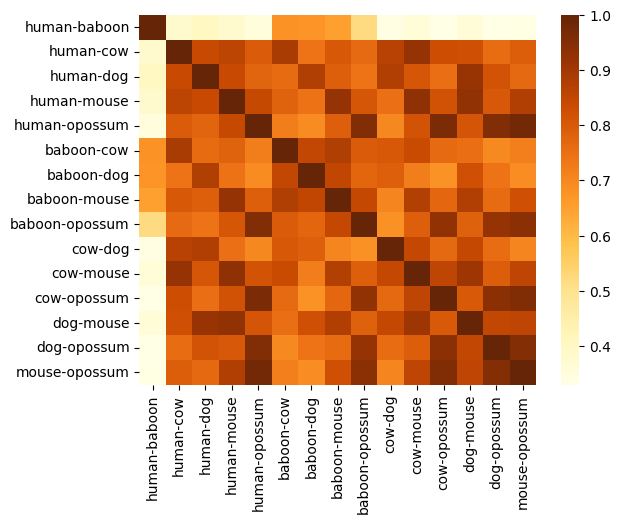

In [12]:
def make_tab(col):
  all = []
  for i in complete_functions[col]:
    if i != 'None':
     for j in i:
        all.append(j)
  tab = pd.DataFrame()
  tab[col] = list(set(all))
  count = []
  for i in tab[col]:
    count.append(all.count(i))
  tab['count'] = count
  return tab

cell_tab = make_tab('cellular_component')
func_tab = make_tab('molecular_functions')
proc_tab = make_tab('biological_process')

corr = dist.corr()
sns.heatmap(corr, cmap="YlOrBr")


In [13]:
melted = pd.DataFrame()
proteins = []
pairs = []
vals = []
for prot in dist.index:
  for pair in dist.columns:
    proteins.append(prot)
    pairs.append(pair)
    vals.append(dist.loc[prot, pair])
melted['protein_id'] = proteins
melted['value'] = vals
melted['pair'] = pairs
sorted = melted.sort_values('value')
sorted = sorted.query('value > 0')
lowest = sorted[:100].drop('pair', axis = 1)
lowest2 = sorted.query('value < 0.00002')
display(len(lowest2))
highest = sorted.tail(100).drop('pair', axis = 1)
#tabulka lowest vyberie prvych 100 riadkov tabulky dist, teda 100 najnizsich hodnot, to iste highest, len 100 najvyssich hodnot
most_freq_lowest = lowest.value_counts()
most_freq_lowest = most_freq_lowest.reset_index().set_index('protein_id')
most_freq_lowest = most_freq_lowest.query('count > 1')
highest = highest.set_index('protein_id')
#most_freq_lowest tabulka je tabulka, ktora pocita kolko krat sa dany protein nachadza v tabulke lowest, teda nam hovori ake proteiny maju medzi kolko parmi najmensie rozdiely
#tabulka lowest by sa dala robit z ovela viac ako prvych 100, kedze hodnot == 0,0001 je az len(lowest2), teda vyse 4000. Avsak vacsina z nich by mala count 1, cize myslim,
#ze analyzovat vsetkych 4000 ktore maju count 1 je zbytocne a staci sa nam zamerat na tie, ktore maju count aspon 2

display(most_freq_lowest)
#v highest sa nenachadzaju proteiny s rovnako vysokou hodnotou medzi viacerymi parmi, cize count je vzdy 1, takze most_frequent highest nerobim
most_freq_highest = highest.tail(len(most_freq_lowest))
display(most_freq_highest)


4547

,value,count
protein_id,,
P60059,0.00001,15
P60002,0.00001,10
P59998,0.00001,10
P62917,0.00001,10
Q6UXN9,0.00001,10
Q7RTV0,0.00001,10
P62910,0.00001,3
Q9NWB6,0.00001,3
Q9UBE8,0.00001,3


,value
protein_id,
Q17RF5,2.516389
Q8N5Q1,2.568131
Q6ZQX7,2.599157
Q53H47,2.735270
Q6ZQX7,2.746796
Q8N5Q1,2.782719
Q8N5Q1,2.916768
Q8N5Q1,3.005446
P26951,3.030621


Text(220.72222222222223, 0.5, 'Cellular Component')

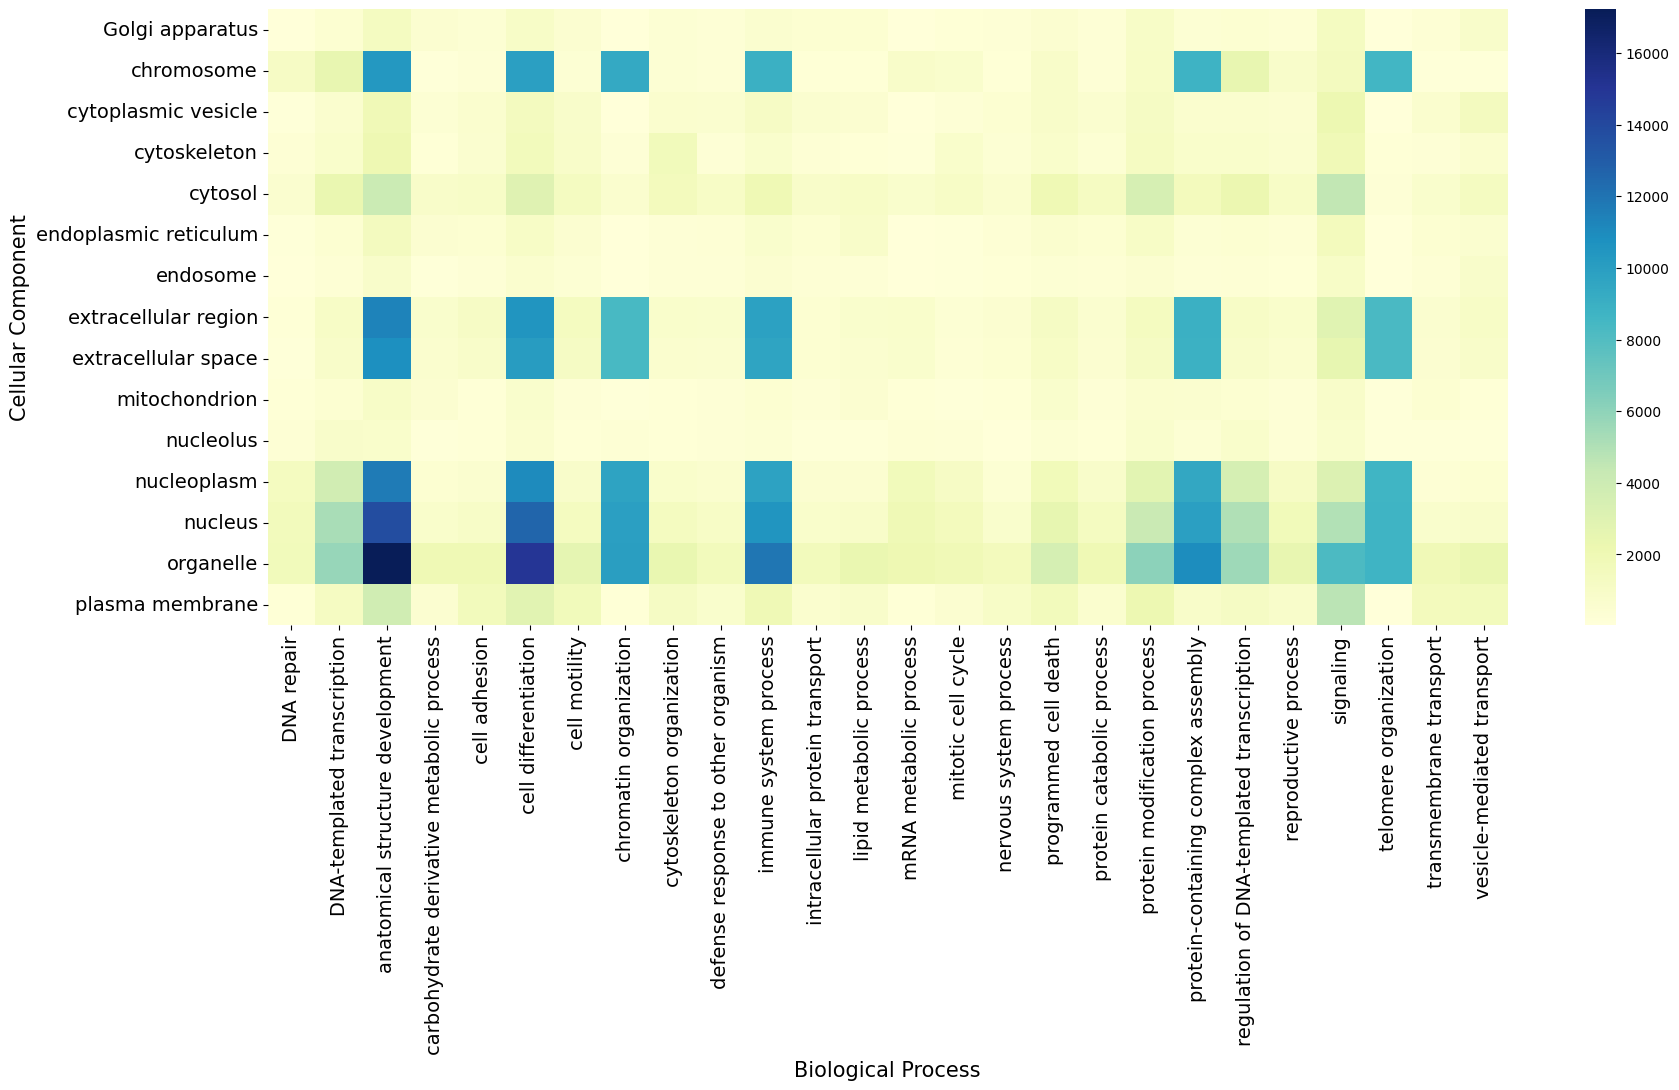

In [17]:
complete= complete_functions.explode('cellular_component').explode('biological_process').explode('molecular_functions')
def filter(df, row, col):
  df = df.loc[:, df.mean() >= row]
  df = df.loc[df.mean(axis=1) >= col]
  return df
co_occurrence = complete.groupby(['cellular_component', 'biological_process']).size().reset_index(name='count')
heatmap_data = co_occurrence.pivot_table(index='cellular_component', columns='biological_process', values='count')
heatmap_data = filter(heatmap_data, 300, 300)
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', xticklabels= True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Biological Process', fontsize=15)
plt.ylabel('Cellular Component', fontsize=15)


molecular_functions,ATP-dependent activity,DNA binding,GTPase activity,None,RNA binding,antioxidant activity,cargo receptor activity,catalytic activity,"catalytic activity, acting on DNA","catalytic activity, acting on RNA",...,protein folding chaperone,protein tag activity,receptor ligand activity,structural molecule activity,transcription regulator activity,transferase activity,translation regulator activity,transporter activity,virus coreceptor activity,virus receptor activity
cellular_component,,,,,,,,,,,,,,,,,,,,,
Golgi apparatus,226.0,559.0,378.0,864.0,246.0,30.0,99.0,3023.0,43.0,38.0,...,26.0,NaN,393.0,287.0,363.0,1733.0,7.0,546.0,NaN,92.0
None,14.0,21.0,10.0,1034.0,83.0,1.0,NaN,368.0,NaN,41.0,...,3.0,NaN,11.0,19.0,9.0,206.0,29.0,33.0,NaN,NaN
chromosome,683.0,22326.0,27.0,768.0,17906.0,27.0,NaN,2741.0,778.0,141.0,...,18.0,NaN,53.0,16923.0,4485.0,1412.0,47.0,34.0,NaN,20.0
cilium,183.0,207.0,126.0,923.0,127.0,3.0,NaN,938.0,NaN,NaN,...,35.0,NaN,44.0,89.0,131.0,370.0,NaN,211.0,NaN,18.0
cytoplasmic vesicle,534.0,566.0,545.0,1393.0,661.0,121.0,202.0,3766.0,64.0,46.0,...,140.0,6.0,725.0,462.0,350.0,1466.0,27.0,1050.0,NaN,243.0
cytoskeleton,658.0,1158.0,420.0,1798.0,865.0,26.0,15.0,3493.0,191.0,82.0,...,61.0,NaN,92.0,979.0,862.0,1778.0,33.0,226.0,NaN,67.0
cytosol,1041.0,3068.0,613.0,2316.0,2971.0,204.0,26.0,9442.0,358.0,532.0,...,215.0,29.0,390.0,1185.0,2438.0,4887.0,345.0,716.0,NaN,90.0
endoplasmic reticulum,310.0,452.0,240.0,928.0,588.0,135.0,83.0,3262.0,66.0,83.0,...,106.0,6.0,549.0,520.0,311.0,1513.0,37.0,870.0,NaN,132.0
endosome,236.0,297.0,311.0,706.0,219.0,41.0,104.0,1689.0,12.0,3.0,...,28.0,6.0,192.0,127.0,156.0,695.0,6.0,561.0,NaN,133.0


Text(220.72222222222223, 0.5, 'Cellular Component')

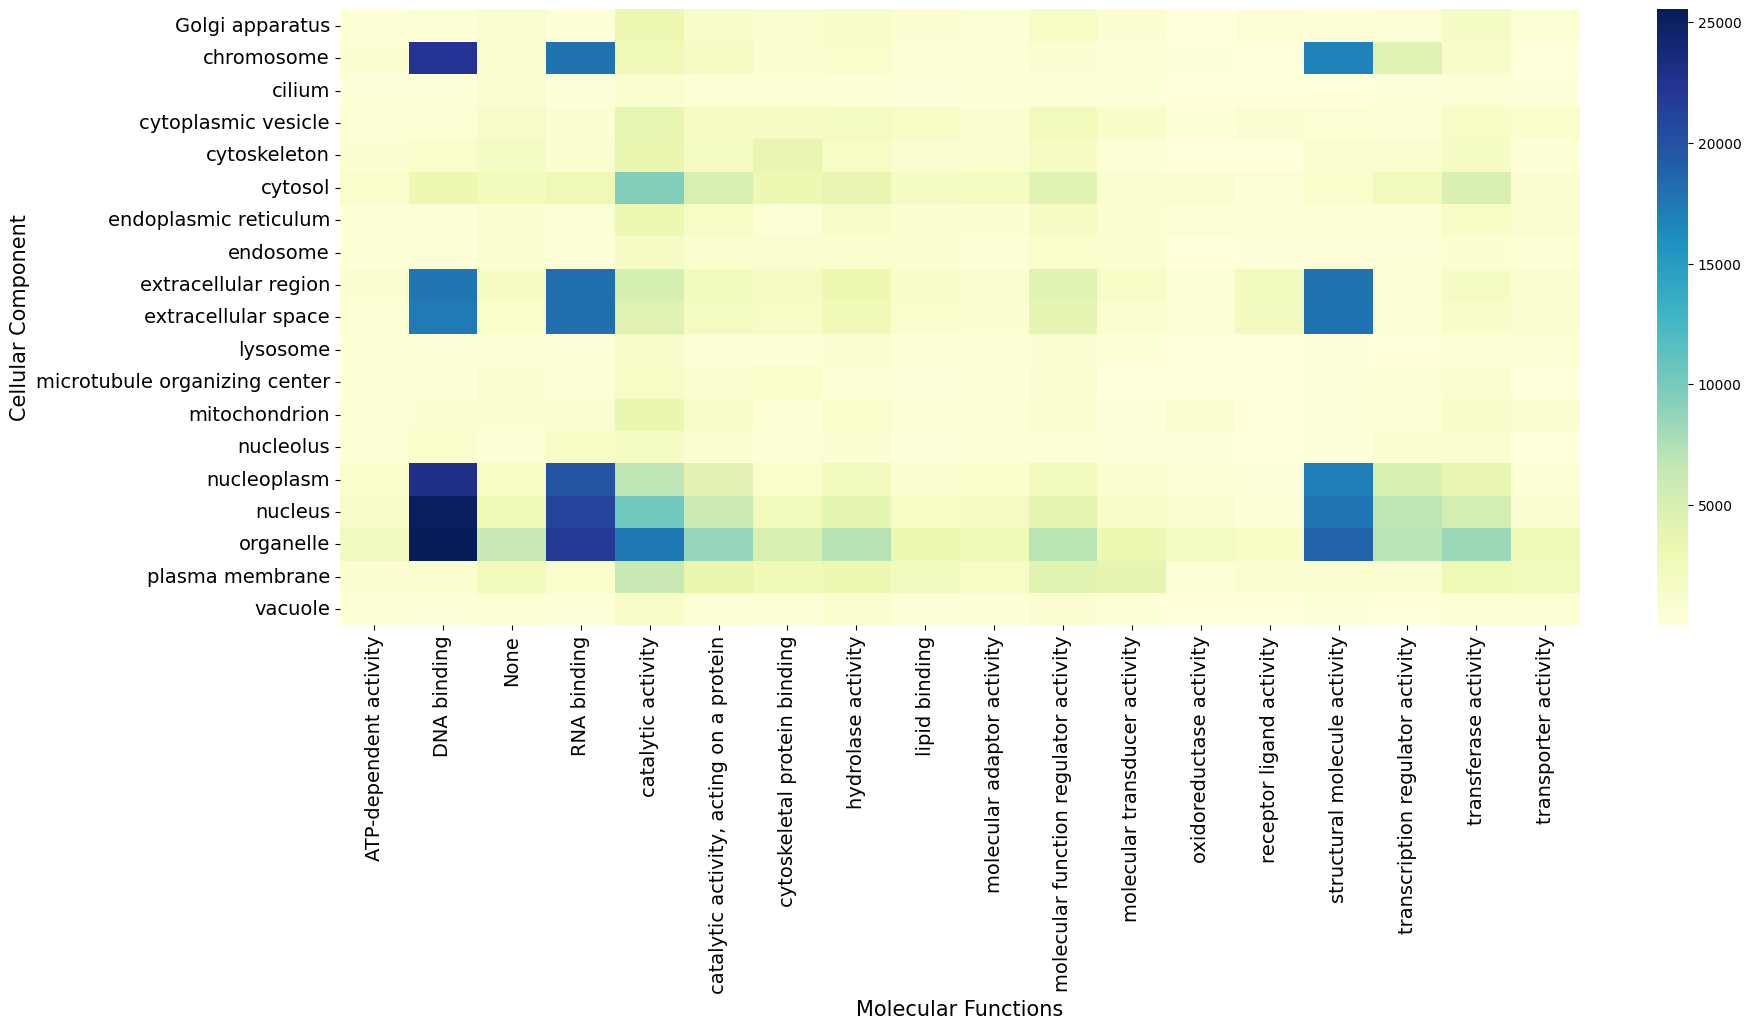

In [18]:
plt.figure(figsize=(20, 8))

co_occurrence2 = complete.groupby(['cellular_component', 'molecular_functions']).size().reset_index(name='count')
heatmap_data2 = co_occurrence2.pivot_table(index='cellular_component', columns='molecular_functions', values='count')
display(heatmap_data2)
heatmap_data2 = filter(heatmap_data2, 300, 300)
sns.heatmap(heatmap_data2, cmap='YlGnBu', xticklabels=True, yticklabels= True )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Molecular Functions', fontsize=15)
plt.ylabel('Cellular Component', fontsize=15)

Text(0.5, 58.7222222222222, 'Molecular Functions')

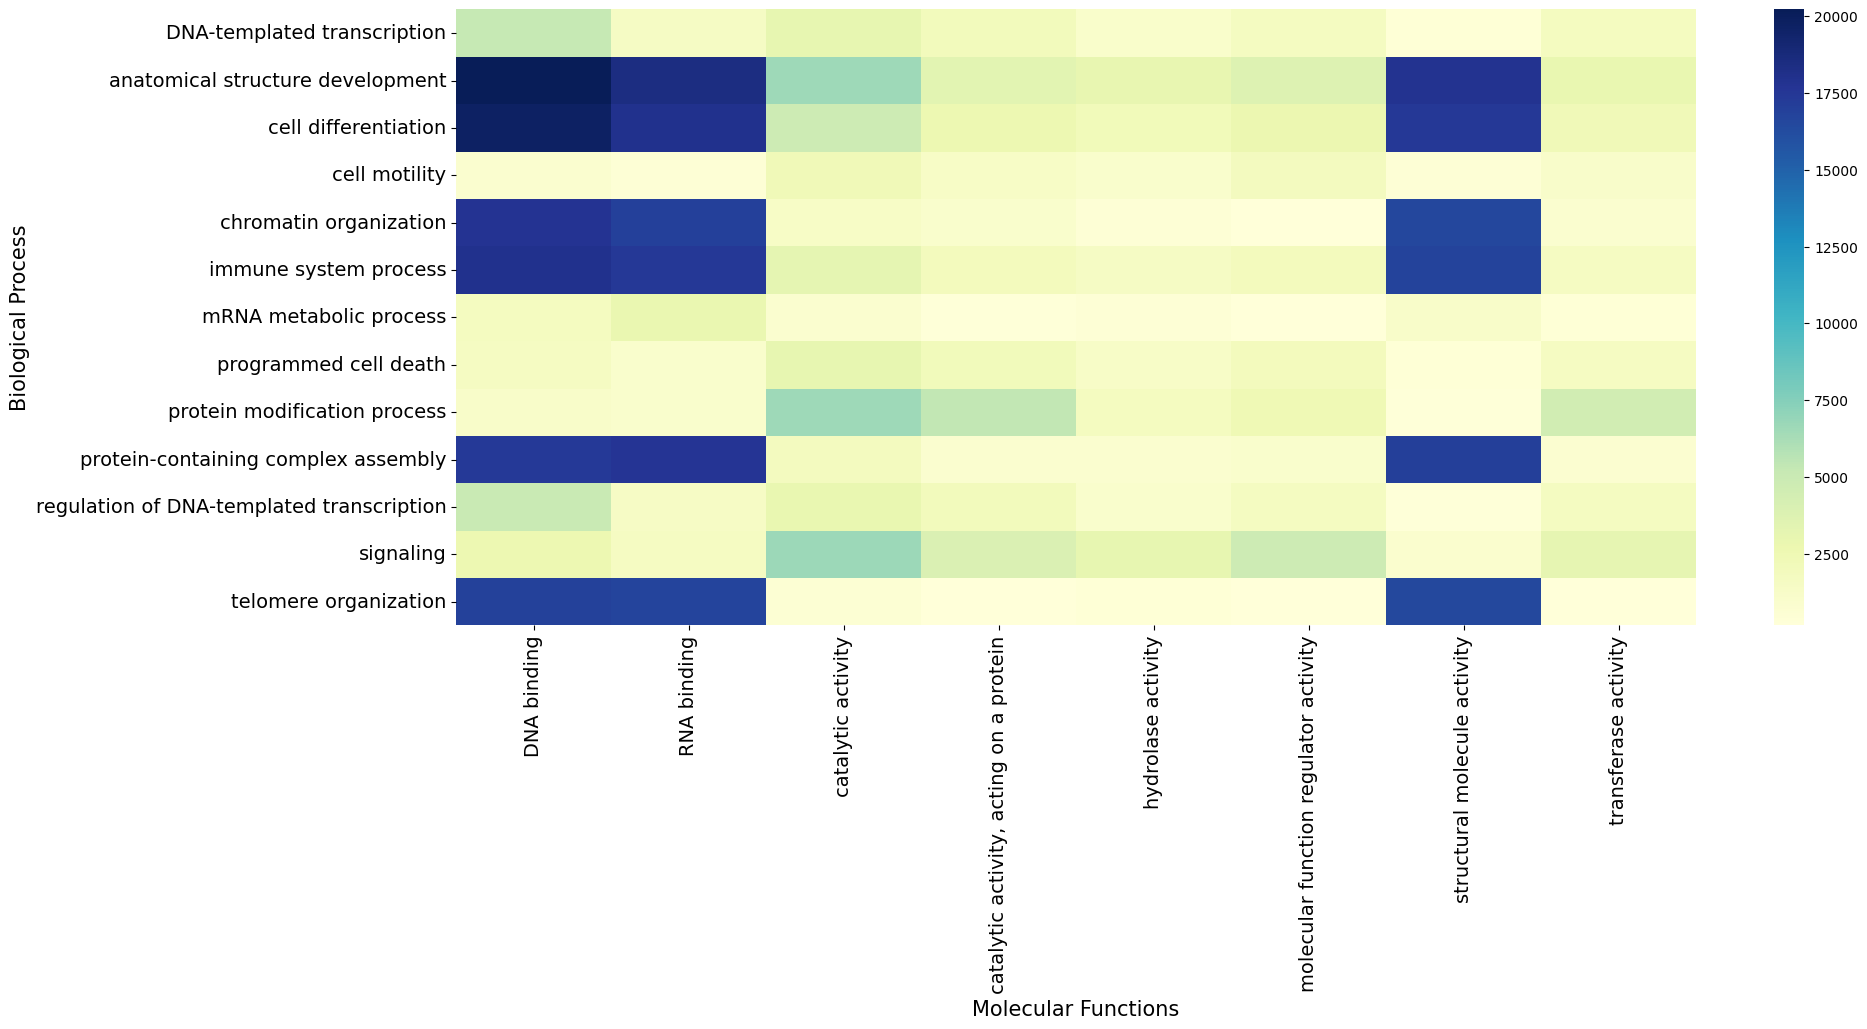

In [19]:
co_occurrence3 = complete.groupby(['biological_process', 'molecular_functions']).size().reset_index(name='count')
plt.figure(figsize=(20, 8))
heatmap_data3 = co_occurrence3.pivot_table(index='biological_process', columns='molecular_functions', values='count', fill_value=0)
heatmap_data3 = filter(heatmap_data3, 500, 1000)
sns.heatmap(heatmap_data3, cmap='YlGnBu', xticklabels=True )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Biological Process', fontsize=15)
plt.xlabel('Molecular Functions', fontsize=15)

In [26]:
new = complete
rows_to_drop = []
for index, row in new.iterrows():
    if 'None' in row.values:
        rows_to_drop.append(index)
new.drop(rows_to_drop, inplace=True)

In [34]:
new100 = new.sample(n=50, random_state=42)

edges = []

for _, row in new100.iterrows():
    cc1 = row['cellular_component']
    mf1 = row['molecular_functions']
    bp1 = row['biological_process']

    if pd.notna(cc1) and pd.notna(mf1):
        cc1_str = str(cc1).strip()
        mf1_str = str(mf1).strip()
        edge = (((cc1_str, mf1_str)))
        edges.append(edge)

    if pd.notna(mf1) and pd.notna(bp1):
        mf1_str = str(mf1).strip()
        bp1_str = str(bp1).strip()
        edge = tuple(((mf1_str, bp1_str)))
        edges.append(edge)

    if pd.notna(cc1) and pd.notna(bp1):
        mf1_str = str(cc1).strip()
        bp1_str = str(bp1).strip()
        edge = tuple(((cc1_str, bp1_str)))
        edges.append(edge)

edge_weights = Counter(edges)

G = nx.Graph()
G.add_edges_from(edge_weights.keys())

pyvis_net = Network("800px", "800px", notebook=True, cdn_resources='in_line')
pyvis_net.from_nx(G)

neighbors = pyvis_net.get_adj_list()

for node in pyvis_net.nodes:
    node_id = node["id"]
    node["title"] = node_id
    node["value"] = len(neighbors[node_id])
    node["label"] = node_id

    if node_id in new100['cellular_component'].dropna().astype(str).values:
        node["group"] = 0
        node["color"] = "magenta"

    elif node_id in new100['molecular_functions'].dropna().astype(str).values:
        node["group"] = 1
        node["color"] = "blue"
    elif node_id in new100['biological_process'].dropna().astype(str).values:
        node["group"] = 2
        node["color"] = "green"

for edge in pyvis_net.edges:
    edge_pair = tuple(((edge['from'], edge['to'])))
    edge['width'] = edge_weights.get(edge_pair, 1)
pyvis_net.show_buttons(filter_=['nodes', 'edges', 'physics', 'layout'])

pyvis_net.force_atlas_2based()
pyvis_net.show_buttons(filter_=['physics'])
pyvis_net.show("net.html")
display(HTML("net.html"))

net.html


In [36]:
for edge in pyvis_net.edges:
    edge_pair = tuple(((edge['from'], edge['to'])))
    edge_weight = edge_weights.get(edge_pair, 1)
    edge['width'] = edge_weight
    node_from = edge['from']
    node_to = edge['to']

    group_from = next((node['group'] for node in pyvis_net.nodes if node['id'] == node_from), None)
    group_to = next((node['group'] for node in pyvis_net.nodes if node['id'] == node_to), None)

    if group_from == 1 or group_to == 1:
        edge['color'] = 'blue'
    else:
        edge['color'] = 'white'

pyvis_net.show_buttons(filter_=['physics'])
pyvis_net.show("net.html")
display(HTML("net.html"))

net.html


In [39]:
for edge in pyvis_net.edges:
    edge_pair = tuple(((edge['from'], edge['to'])))
    edge_weight = edge_weights.get(edge_pair, 1)
    edge['width'] = edge_weight
    node_from = edge['from']
    node_to = edge['to']

    group_from = next((node['group'] for node in pyvis_net.nodes if node['id'] == node_from), None)
    group_to = next((node['group'] for node in pyvis_net.nodes if node['id'] == node_to), None)

    if group_from == 0 or group_to == 0:
        edge['color'] = 'magenta'
    else:
        edge['color'] = 'white'

pyvis_net.show_buttons(filter_=['physics'])
pyvis_net.show("net.html")
display(HTML("net.html"))

net.html


In [40]:
for edge in pyvis_net.edges:
    edge_pair = tuple(((edge['from'], edge['to'])))
    edge_weight = edge_weights.get(edge_pair, 1)
    edge['width'] = edge_weight
    node_from = edge['from']
    node_to = edge['to']

    group_from = next((node['group'] for node in pyvis_net.nodes if node['id'] == node_from), None)
    group_to = next((node['group'] for node in pyvis_net.nodes if node['id'] == node_to), None)

    if group_from == 2 or group_to == 2:
        edge['color'] = 'green'
    else:
        edge['color'] = 'white'

pyvis_net.show_buttons(filter_=['physics'])
pyvis_net.show("net.html")
display(HTML("net.html"))

net.html


In [41]:
species = pd.Series(['Human', 'Olive baboon', 'House mouse', 'Domestic dog', 'Bovine, Hereford cattle', 'Gray short-tailed opossum'])
latin = pd.Series(['Homo sapiens', 'Papio anubis', 'Mus musculus', 'Canis lupus familiaris', 'Bos taurus', 'Monodelphis domestica'])
class_tax = pd.Series(['Mammalia']*6)
clade = pd.Series(['Boreoeutheria', 'Boreoeutheria', 'Boreoeutheria', 'Boreoeutheria', 'Boreoeutheria', 'Ameridelphia'])
order = pd.Series(['Primates', 'Primates', 'Rodentia', 'Carnivora', 'Artiodactyla', 'Didelphimorphia'])
subdivision = pd.Series(['Euarchontoglires', 'Euarchontoglires', 'Euarchontoglires', 'Laurasiatheria', 'Laurasiatheria', 'Phalangeriformes'])

table_taxonomy = pd.DataFrame({'species':species,
                               'latin':latin,
                               'taxonomy_class':class_tax,
                               'clade':clade,
                               'order':order,
                               'sub class':subdivision}).set_index(['taxonomy_class', 'clade', 'sub class', 'order', 'species'])

display(table_taxonomy)

latin
taxonomy_class clade         sub class        order           species                                          
Mammalia       Boreoeutheria Euarchontoglires Primates        Human                                Homo sapiens
                                                              Olive baboon                         Papio anubis
                                              Rodentia        House mouse                          Mus musculus
                             Laurasiatheria   Carnivora       Domestic dog               Canis lupus familiaris
                                              Artiodactyla    Bovine, Hereford cattle                Bos taurus
               Ameridelphia  Phalangeriformes Didelphimorphia Gray short-tailed opossum   Monodelphis domestica

{'Mammalia': Text(346.05, 306.0, 'Mammalia'),
 'Boreoeutheria': Text(285.05, 234.0, 'Boreoeutheria'),
 'Euarchontoglires': Text(210.05, 162.0, 'Euarchontoglires'),
 'Primates': Text(94.047, 90.0, 'Primates'),
 'Human': Text(37.047, 18.0, 'Human'),
 'Olive baboon': Text(151.05, 18.0, 'Olive baboon'),
 'House mouse': Text(213.05, 90.0, 'House mouse'),
 'Laurasiatheria': Text(360.05, 162.0, 'Laurasiatheria'),
 'Domestic dog': Text(357.05, 90.0, 'Domestic dog'),
 'Hereford cattle': Text(499.05, 90.0, 'Hereford cattle'),
 'Opossum': Text(408.05, 234.0, 'Opossum')}

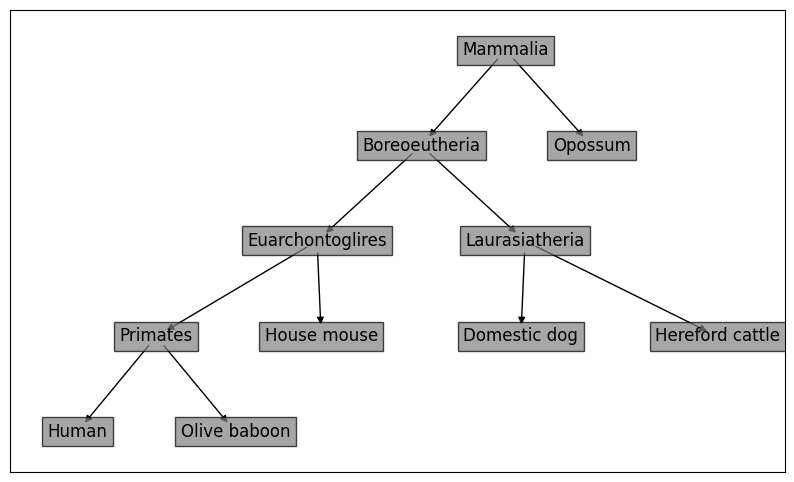

In [43]:
G = nx.DiGraph()
table = table_taxonomy.drop('latin', axis = 1)
for (taxonomy_class, clade, sub_class, order, species) in table.index:
  if species == 'Gray short-tailed opossum':
    species = 'Opossum'
  if species == 'Bovine, Hereford cattle':
    species = 'Hereford cattle'
  G.add_edge(taxonomy_class, clade, shape='square')
  G.add_edge(clade, sub_class)
  G.add_edge(sub_class, order)
  G.add_edge(order, species)
G.add_edge('Laurasiatheria', 'Domestic dog')
G.add_edge('Laurasiatheria', 'Hereford cattle')
G.add_edge('Euarchontoglires', 'House mouse')
G.add_edge('Mammalia', 'Opossum')
node_list = list(G.nodes())
for node in node_list:
  if node in ['Rodentia', 'Artiodactyla', 'Didelphimorphia', 'Carnivora', 'Phalangeriformes', 'Ameridelphia']:
    G.remove_node(node)
(figure, axes) = plt.subplots(figsize=(10, 6))
coordinates = nx.nx_agraph.graphviz_layout(G, prog="dot")
label_options = {"ec": "black", "fc": 'gray', "alpha": 0.7}
nx.draw_networkx_edges(G, coordinates, ax=axes)
nx.draw_networkx_labels(G, coordinates, font_size=12, bbox=label_options, ax=axes)